In [53]:
# To zhuzhu
import re
import requests
import pandas as pd
import numpy as np
from time import sleep
from bs4 import BeautifulSoup
import pickle # for loading a dictionary from disk
from typing import Optional # typehint that value can also be None

import json,re,os
from urllib.parse import quote
from dataprep.clean import validate_country
from dataprep.clean import clean_country
import pycountry_convert as pc
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Fix the plos dataset

In [22]:
# fix the plos dataset
plos = pd.read_csv('../Web_Scraping/PLOS.csv')
plos['index']=plos.index
plos = plos.drop(columns=['Unnamed: 0'])

fix_dic = {'Villeneuve-les-Béziers France': 'France','Korea': 'South Korea','North Macedonia': 'Macedonia',\
           'The Netherlands': 'Netherlands','England': 'United Kingdom','People’s Republic of China': 'China',\
           'Affiliation\n    Defense POW/MIA Accounting Agency': np.nan,'United State of America': 'United States of America',\
           'Ontario Canada': 'Canada', 'Czechia': 'Czech Republic','México': 'Mexico','Scotland':'United Kingdom',\
           'The Philippines': 'Philippines','Lao PDR': 'Laos', np.nan: np.nan,'German': 'Germany','PR China': 'China',\
           'P.R. of China': 'China','Italia': 'Italy', 'Perú': 'Peru','Florida': 'United States of America',\
           'New Mexico United States of America': 'United States of America','United Sates of America': 'United States of America',\
           'Lima-Peru': 'Peru','Northern Ireland': 'United Kingdom','Republic of Ireland': 'Ireland','Canberra ACT Australia': 'Australia',\
           'Orkney': 'United Kingdom','04103': 'United States of America','Taiwan ROC': 'Taiwan','PA United States of America': 'United States of America',\
           'California': 'United States of America','Himeji Japan': 'Japan','Poland/Germany': 'Poland','Great Britain': 'United Kingdom',\
           'Brasil': 'Brazil','the Netherlands': 'Netherlands','Egypte': 'Egypt','China 230026': 'China', 'LAO People’s Democratic Republic': 'Laos',\
           'Hull United Kingdom': 'United Kingdom','España': 'Spain','Puerto Madryn. Argentina': 'Argentina',\
           'République du Niger': 'Niger',"People's Republic of China":'China','USA':'United States of America','Republic of Korea':'South Korea'}


plos = plos.replace(fix_dic)

mask = validate_country(plos['Nationality'])
valid_country = plos[mask]
invalid_country = plos[mask == False]

plos_fixed = valid_country

plos_fixed = clean_country(plos_fixed, "Nationality")


plos_fixed['country_code']= plos_fixed.Nationality_clean.apply(lambda x : pc.country_name_to_country_alpha2(x, cn_name_format="default"))

plos_fixed['region_code'] = plos_fixed.country_code.apply(lambda x: pc.country_alpha2_to_continent_code(x))


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	951 values cleaned (15.65%)
Result contains 6075 (100.0%) values in the correct format and 0 null values (0.0%)


In [23]:
plos_fixed

,DOI,Journal,Type,Title,Publish_Time,Issue_Time,Co Author,Author,Rank,Nationality,Abs_country,Abs_GPE,Abs_LOC,index,Nationality_clean,country_code,region_code
0,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,Mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Abay Namen,First,Kazakhstan,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],0,Kazakhstan,KZ,AS
1,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,Mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Radu Iovita,Other,United States of America,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],1,United States,US,NA
2,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,Mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Klaus G. Nickel,Other,Germany,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],2,Germany,DE,EU
3,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,Mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Aristeidis Varis,Other,Germany,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],3,Germany,DE,EU
4,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,Mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Zhaken Taimagambetov,Other,Kazakhstan,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],4,Kazakhstan,KZ,AS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,Melanesian mtDNA Complexity,"February 28, 2007","February 28, 2007",True,George Koki,Other,Papua New Guinea,['32' '16' 'Australia' 'Taiwan'],['Australia' 'Taiwan'],['Island Southeast Asia' 'Island Southeast Asi...,6075,Papua New Guinea,PG,OC
6076,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,Melanesian mtDNA Complexity,"February 28, 2007","February 28, 2007",True,Gisele Horvat,Other,United States of America,['32' '16' 'Australia' 'Taiwan'],['Australia' 'Taiwan'],['Island Southeast Asia' 'Island Southeast Asi...,6076,United States,US,NA
6077,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,Melanesian mtDNA Complexity,"February 28, 2007","February 28, 2007",True,Sergey Zhadanov,Other,United States of America,['32' '16' 'Australia' 'Taiwan'],['Australia' 'Taiwan'],['Island Southeast Asia' 'Island Southeast Asi...,6077,United States,US,NA
6078,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,Melanesian mtDNA Complexity,"February 28, 2007","February 28, 2007",True,Theodore G. Schurr,Other,United States of America,['32' '16' 'Australia' 'Taiwan'],['Australia' 'Taiwan'],['Island Southeast Asia' 'Island Southeast Asi...,6078,United States,US,NA


## Extract the target country (plos)

In [24]:
import spacy
from spacy import displacy
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Larger and slower pipeline but more accurate
spacy.cli.download("en_core_web_trf")
NER= spacy.load("en_core_web_trf")
                   
# Faster and smaller pipelien, less accurate                   
#spacy.cli.download("en_core_web_sm")
#NER= spacy.load("en_core_web_sm")


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')


In [25]:
from collections import defaultdict
# Clean the Title column:
# Lower case
res = plos_fixed[['Title']].apply(lambda x: x[0].lower(),axis = 1)
# Replace all none alphanumeric characters with spaces
#res = res.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
# Remove all double
res = res.apply(lambda x: re.sub("\s\s+", " ", x))
plos_fixed['Title'] = res.values

# Demo
demo_text = res.unique()[100:110]
for raw_text in demo_text:
    text_ner = NER(raw_text)
    displacy.render(text_ner,style="ent",jupyter=True)
    tuple_list = [(X.label_, X.text) for X in text_ner.ents]
    print(tuple_list)
    demo_dict = defaultdict(list)
    for (label,value) in tuple_list:
        demo_dict[label].append(value)
    print(demo_dict)

[('LOC', 'western europe')]
defaultdict(<class 'list'>, {'LOC': ['western europe']})


[('GPE', 'colombia')]
defaultdict(<class 'list'>, {'GPE': ['colombia']})


[]
defaultdict(<class 'list'>, {})


[('FAC', 'the salt mine'), ('GPE', 'douzlākh'), ('GPE', 'iran')]
defaultdict(<class 'list'>, {'FAC': ['the salt mine'], 'GPE': ['douzlākh', 'iran']})


[]
defaultdict(<class 'list'>, {})


[('GPE', 'maya'), ('LOC', 'the puuc region'), ('GPE', 'yucatan'), ('GPE', 'mexico')]
defaultdict(<class 'list'>, {'GPE': ['maya', 'yucatan', 'mexico'], 'LOC': ['the puuc region']})


[('LOC', 'maya')]
defaultdict(<class 'list'>, {'LOC': ['maya']})


[('GPE', 'sweden'), ('GPE', 'scania')]
defaultdict(<class 'list'>, {'GPE': ['sweden', 'scania']})


[('LOC', 'san francisco bay’s')]
defaultdict(<class 'list'>, {'LOC': ['san francisco bay’s']})


[('FAC', 'the árpádian age cemetery'), ('GPE', 'győrszentiván-révhegyi tag'), ('GPE', 'győr-moson-sopron county'), ('GPE', 'hungary')]
defaultdict(<class 'list'>, {'FAC': ['the árpádian age cemetery'], 'GPE': ['győrszentiván-révhegyi tag', 'győr-moson-sopron county', 'hungary']})


In [26]:
# Extract all the  ORG, LOC, GPE, NORP,LANGUAGE
# Preference: GPE > NORP > LOC > ORG > LANGUAGE

# GPE: Countries, cities, states.
# NORP: Nationalities or religious or political groups.
# LOC: Non-GPE locations, mountain ranges, bodies of water.
# ORG: Companies, agencies, institutions, etc.
# LANGUAGE: Any named language.

plos_final = plos_fixed.copy()
GPE_list =[]
NORP_list =[]
LOC_list =[]
ORG_list =[]
LANG_list =[]
for i in range(len(plos_final)):
    raw_text = plos_final.iloc[i].Title
    text_ner = NER(raw_text)
    print(f'Processing the {i}th title')
 #   displacy.render(text_ner,style="ent",jupyter=True)
    tuple_list = [(X.label_, X.text) for X in text_ner.ents]
    tag_dict = defaultdict(list)
    for (label,value) in tuple_list:
        tag_dict[label].append(value)
    GPE_list.append(tag_dict['GPE'])
    NORP_list.append(tag_dict['NORP'])
    LOC_list.append(tag_dict['LOC'])
    ORG_list.append(tag_dict['ORG'])
    LANG_list.append(tag_dict['LANGUAGE'])
plos_final['GPE'] = GPE_list
plos_final['NORP'] = NORP_list
plos_final['LOC'] = LOC_list
plos_final['ORG'] = ORG_list
plos_final['LANG'] = LANG_list

Processing the 0th title
Processing the 1th title
Processing the 2th title
Processing the 3th title
Processing the 4th title
Processing the 5th title
Processing the 6th title
Processing the 7th title
Processing the 8th title
Processing the 9th title
Processing the 10th title
Processing the 11th title
Processing the 12th title
Processing the 13th title
Processing the 14th title
Processing the 15th title
Processing the 16th title
Processing the 17th title
Processing the 18th title
Processing the 19th title
Processing the 20th title
Processing the 21th title
Processing the 22th title
Processing the 23th title
Processing the 24th title
Processing the 25th title
Processing the 26th title
Processing the 27th title
Processing the 28th title
Processing the 29th title
Processing the 30th title
Processing the 31th title
Processing the 32th title
Processing the 33th title
Processing the 34th title
Processing the 35th title
Processing the 36th title
Processing the 37th title
Processing the 38th ti

Processing the 308th title
Processing the 309th title
Processing the 310th title
Processing the 311th title
Processing the 312th title
Processing the 313th title
Processing the 314th title
Processing the 315th title
Processing the 316th title
Processing the 317th title
Processing the 318th title
Processing the 319th title
Processing the 320th title
Processing the 321th title
Processing the 322th title
Processing the 323th title
Processing the 324th title
Processing the 325th title
Processing the 326th title
Processing the 327th title
Processing the 328th title
Processing the 329th title
Processing the 330th title
Processing the 331th title
Processing the 332th title
Processing the 333th title
Processing the 334th title
Processing the 335th title
Processing the 336th title
Processing the 337th title
Processing the 338th title
Processing the 339th title
Processing the 340th title
Processing the 341th title
Processing the 342th title
Processing the 343th title
Processing the 344th title
P

Processing the 612th title
Processing the 613th title
Processing the 614th title
Processing the 615th title
Processing the 616th title
Processing the 617th title
Processing the 618th title
Processing the 619th title
Processing the 620th title
Processing the 621th title
Processing the 622th title
Processing the 623th title
Processing the 624th title
Processing the 625th title
Processing the 626th title
Processing the 627th title
Processing the 628th title
Processing the 629th title
Processing the 630th title
Processing the 631th title
Processing the 632th title
Processing the 633th title
Processing the 634th title
Processing the 635th title
Processing the 636th title
Processing the 637th title
Processing the 638th title
Processing the 639th title
Processing the 640th title
Processing the 641th title
Processing the 642th title
Processing the 643th title
Processing the 644th title
Processing the 645th title
Processing the 646th title
Processing the 647th title
Processing the 648th title
P

Processing the 917th title
Processing the 918th title
Processing the 919th title
Processing the 920th title
Processing the 921th title
Processing the 922th title
Processing the 923th title
Processing the 924th title
Processing the 925th title
Processing the 926th title
Processing the 927th title
Processing the 928th title
Processing the 929th title
Processing the 930th title
Processing the 931th title
Processing the 932th title
Processing the 933th title
Processing the 934th title
Processing the 935th title
Processing the 936th title
Processing the 937th title
Processing the 938th title
Processing the 939th title
Processing the 940th title
Processing the 941th title
Processing the 942th title
Processing the 943th title
Processing the 944th title
Processing the 945th title
Processing the 946th title
Processing the 947th title
Processing the 948th title
Processing the 949th title
Processing the 950th title
Processing the 951th title
Processing the 952th title
Processing the 953th title
P

Processing the 1214th title
Processing the 1215th title
Processing the 1216th title
Processing the 1217th title
Processing the 1218th title
Processing the 1219th title
Processing the 1220th title
Processing the 1221th title
Processing the 1222th title
Processing the 1223th title
Processing the 1224th title
Processing the 1225th title
Processing the 1226th title
Processing the 1227th title
Processing the 1228th title
Processing the 1229th title
Processing the 1230th title
Processing the 1231th title
Processing the 1232th title
Processing the 1233th title
Processing the 1234th title
Processing the 1235th title
Processing the 1236th title
Processing the 1237th title
Processing the 1238th title
Processing the 1239th title
Processing the 1240th title
Processing the 1241th title
Processing the 1242th title
Processing the 1243th title
Processing the 1244th title
Processing the 1245th title
Processing the 1246th title
Processing the 1247th title
Processing the 1248th title
Processing the 1249t

Processing the 1507th title
Processing the 1508th title
Processing the 1509th title
Processing the 1510th title
Processing the 1511th title
Processing the 1512th title
Processing the 1513th title
Processing the 1514th title
Processing the 1515th title
Processing the 1516th title
Processing the 1517th title
Processing the 1518th title
Processing the 1519th title
Processing the 1520th title
Processing the 1521th title
Processing the 1522th title
Processing the 1523th title
Processing the 1524th title
Processing the 1525th title
Processing the 1526th title
Processing the 1527th title
Processing the 1528th title
Processing the 1529th title
Processing the 1530th title
Processing the 1531th title
Processing the 1532th title
Processing the 1533th title
Processing the 1534th title
Processing the 1535th title
Processing the 1536th title
Processing the 1537th title
Processing the 1538th title
Processing the 1539th title
Processing the 1540th title
Processing the 1541th title
Processing the 1542t

Processing the 1801th title
Processing the 1802th title
Processing the 1803th title
Processing the 1804th title
Processing the 1805th title
Processing the 1806th title
Processing the 1807th title
Processing the 1808th title
Processing the 1809th title
Processing the 1810th title
Processing the 1811th title
Processing the 1812th title
Processing the 1813th title
Processing the 1814th title
Processing the 1815th title
Processing the 1816th title
Processing the 1817th title
Processing the 1818th title
Processing the 1819th title
Processing the 1820th title
Processing the 1821th title
Processing the 1822th title
Processing the 1823th title
Processing the 1824th title
Processing the 1825th title
Processing the 1826th title
Processing the 1827th title
Processing the 1828th title
Processing the 1829th title
Processing the 1830th title
Processing the 1831th title
Processing the 1832th title
Processing the 1833th title
Processing the 1834th title
Processing the 1835th title
Processing the 1836t

Processing the 2095th title
Processing the 2096th title
Processing the 2097th title
Processing the 2098th title
Processing the 2099th title
Processing the 2100th title
Processing the 2101th title
Processing the 2102th title
Processing the 2103th title
Processing the 2104th title
Processing the 2105th title
Processing the 2106th title
Processing the 2107th title
Processing the 2108th title
Processing the 2109th title
Processing the 2110th title
Processing the 2111th title
Processing the 2112th title
Processing the 2113th title
Processing the 2114th title
Processing the 2115th title
Processing the 2116th title
Processing the 2117th title
Processing the 2118th title
Processing the 2119th title
Processing the 2120th title
Processing the 2121th title
Processing the 2122th title
Processing the 2123th title
Processing the 2124th title
Processing the 2125th title
Processing the 2126th title
Processing the 2127th title
Processing the 2128th title
Processing the 2129th title
Processing the 2130t

Processing the 2389th title
Processing the 2390th title
Processing the 2391th title
Processing the 2392th title
Processing the 2393th title
Processing the 2394th title
Processing the 2395th title
Processing the 2396th title
Processing the 2397th title
Processing the 2398th title
Processing the 2399th title
Processing the 2400th title
Processing the 2401th title
Processing the 2402th title
Processing the 2403th title
Processing the 2404th title
Processing the 2405th title
Processing the 2406th title
Processing the 2407th title
Processing the 2408th title
Processing the 2409th title
Processing the 2410th title
Processing the 2411th title
Processing the 2412th title
Processing the 2413th title
Processing the 2414th title
Processing the 2415th title
Processing the 2416th title
Processing the 2417th title
Processing the 2418th title
Processing the 2419th title
Processing the 2420th title
Processing the 2421th title
Processing the 2422th title
Processing the 2423th title
Processing the 2424t

Processing the 2682th title
Processing the 2683th title
Processing the 2684th title
Processing the 2685th title
Processing the 2686th title
Processing the 2687th title
Processing the 2688th title
Processing the 2689th title
Processing the 2690th title
Processing the 2691th title
Processing the 2692th title
Processing the 2693th title
Processing the 2694th title
Processing the 2695th title
Processing the 2696th title
Processing the 2697th title
Processing the 2698th title
Processing the 2699th title
Processing the 2700th title
Processing the 2701th title
Processing the 2702th title
Processing the 2703th title
Processing the 2704th title
Processing the 2705th title
Processing the 2706th title
Processing the 2707th title
Processing the 2708th title
Processing the 2709th title
Processing the 2710th title
Processing the 2711th title
Processing the 2712th title
Processing the 2713th title
Processing the 2714th title
Processing the 2715th title
Processing the 2716th title
Processing the 2717t

Processing the 2976th title
Processing the 2977th title
Processing the 2978th title
Processing the 2979th title
Processing the 2980th title
Processing the 2981th title
Processing the 2982th title
Processing the 2983th title
Processing the 2984th title
Processing the 2985th title
Processing the 2986th title
Processing the 2987th title
Processing the 2988th title
Processing the 2989th title
Processing the 2990th title
Processing the 2991th title
Processing the 2992th title
Processing the 2993th title
Processing the 2994th title
Processing the 2995th title
Processing the 2996th title
Processing the 2997th title
Processing the 2998th title
Processing the 2999th title
Processing the 3000th title
Processing the 3001th title
Processing the 3002th title
Processing the 3003th title
Processing the 3004th title
Processing the 3005th title
Processing the 3006th title
Processing the 3007th title
Processing the 3008th title
Processing the 3009th title
Processing the 3010th title
Processing the 3011t

Processing the 3269th title
Processing the 3270th title
Processing the 3271th title
Processing the 3272th title
Processing the 3273th title
Processing the 3274th title
Processing the 3275th title
Processing the 3276th title
Processing the 3277th title
Processing the 3278th title
Processing the 3279th title
Processing the 3280th title
Processing the 3281th title
Processing the 3282th title
Processing the 3283th title
Processing the 3284th title
Processing the 3285th title
Processing the 3286th title
Processing the 3287th title
Processing the 3288th title
Processing the 3289th title
Processing the 3290th title
Processing the 3291th title
Processing the 3292th title
Processing the 3293th title
Processing the 3294th title
Processing the 3295th title
Processing the 3296th title
Processing the 3297th title
Processing the 3298th title
Processing the 3299th title
Processing the 3300th title
Processing the 3301th title
Processing the 3302th title
Processing the 3303th title
Processing the 3304t

Processing the 3563th title
Processing the 3564th title
Processing the 3565th title
Processing the 3566th title
Processing the 3567th title
Processing the 3568th title
Processing the 3569th title
Processing the 3570th title
Processing the 3571th title
Processing the 3572th title
Processing the 3573th title
Processing the 3574th title
Processing the 3575th title
Processing the 3576th title
Processing the 3577th title
Processing the 3578th title
Processing the 3579th title
Processing the 3580th title
Processing the 3581th title
Processing the 3582th title
Processing the 3583th title
Processing the 3584th title
Processing the 3585th title
Processing the 3586th title
Processing the 3587th title
Processing the 3588th title
Processing the 3589th title
Processing the 3590th title
Processing the 3591th title
Processing the 3592th title
Processing the 3593th title
Processing the 3594th title
Processing the 3595th title
Processing the 3596th title
Processing the 3597th title
Processing the 3598t

Processing the 3857th title
Processing the 3858th title
Processing the 3859th title
Processing the 3860th title
Processing the 3861th title
Processing the 3862th title
Processing the 3863th title
Processing the 3864th title
Processing the 3865th title
Processing the 3866th title
Processing the 3867th title
Processing the 3868th title
Processing the 3869th title
Processing the 3870th title
Processing the 3871th title
Processing the 3872th title
Processing the 3873th title
Processing the 3874th title
Processing the 3875th title
Processing the 3876th title
Processing the 3877th title
Processing the 3878th title
Processing the 3879th title
Processing the 3880th title
Processing the 3881th title
Processing the 3882th title
Processing the 3883th title
Processing the 3884th title
Processing the 3885th title
Processing the 3886th title
Processing the 3887th title
Processing the 3888th title
Processing the 3889th title
Processing the 3890th title
Processing the 3891th title
Processing the 3892t

Processing the 4151th title
Processing the 4152th title
Processing the 4153th title
Processing the 4154th title
Processing the 4155th title
Processing the 4156th title
Processing the 4157th title
Processing the 4158th title
Processing the 4159th title
Processing the 4160th title
Processing the 4161th title
Processing the 4162th title
Processing the 4163th title
Processing the 4164th title
Processing the 4165th title
Processing the 4166th title
Processing the 4167th title
Processing the 4168th title
Processing the 4169th title
Processing the 4170th title
Processing the 4171th title
Processing the 4172th title
Processing the 4173th title
Processing the 4174th title
Processing the 4175th title
Processing the 4176th title
Processing the 4177th title
Processing the 4178th title
Processing the 4179th title
Processing the 4180th title
Processing the 4181th title
Processing the 4182th title
Processing the 4183th title
Processing the 4184th title
Processing the 4185th title
Processing the 4186t

Processing the 4444th title
Processing the 4445th title
Processing the 4446th title
Processing the 4447th title
Processing the 4448th title
Processing the 4449th title
Processing the 4450th title
Processing the 4451th title
Processing the 4452th title
Processing the 4453th title
Processing the 4454th title
Processing the 4455th title
Processing the 4456th title
Processing the 4457th title
Processing the 4458th title
Processing the 4459th title
Processing the 4460th title
Processing the 4461th title
Processing the 4462th title
Processing the 4463th title
Processing the 4464th title
Processing the 4465th title
Processing the 4466th title
Processing the 4467th title
Processing the 4468th title
Processing the 4469th title
Processing the 4470th title
Processing the 4471th title
Processing the 4472th title
Processing the 4473th title
Processing the 4474th title
Processing the 4475th title
Processing the 4476th title
Processing the 4477th title
Processing the 4478th title
Processing the 4479t

Processing the 4738th title
Processing the 4739th title
Processing the 4740th title
Processing the 4741th title
Processing the 4742th title
Processing the 4743th title
Processing the 4744th title
Processing the 4745th title
Processing the 4746th title
Processing the 4747th title
Processing the 4748th title
Processing the 4749th title
Processing the 4750th title
Processing the 4751th title
Processing the 4752th title
Processing the 4753th title
Processing the 4754th title
Processing the 4755th title
Processing the 4756th title
Processing the 4757th title
Processing the 4758th title
Processing the 4759th title
Processing the 4760th title
Processing the 4761th title
Processing the 4762th title
Processing the 4763th title
Processing the 4764th title
Processing the 4765th title
Processing the 4766th title
Processing the 4767th title
Processing the 4768th title
Processing the 4769th title
Processing the 4770th title
Processing the 4771th title
Processing the 4772th title
Processing the 4773t

Processing the 5031th title
Processing the 5032th title
Processing the 5033th title
Processing the 5034th title
Processing the 5035th title
Processing the 5036th title
Processing the 5037th title
Processing the 5038th title
Processing the 5039th title
Processing the 5040th title
Processing the 5041th title
Processing the 5042th title
Processing the 5043th title
Processing the 5044th title
Processing the 5045th title
Processing the 5046th title
Processing the 5047th title
Processing the 5048th title
Processing the 5049th title
Processing the 5050th title
Processing the 5051th title
Processing the 5052th title
Processing the 5053th title
Processing the 5054th title
Processing the 5055th title
Processing the 5056th title
Processing the 5057th title
Processing the 5058th title
Processing the 5059th title
Processing the 5060th title
Processing the 5061th title
Processing the 5062th title
Processing the 5063th title
Processing the 5064th title
Processing the 5065th title
Processing the 5066t

Processing the 5325th title
Processing the 5326th title
Processing the 5327th title
Processing the 5328th title
Processing the 5329th title
Processing the 5330th title
Processing the 5331th title
Processing the 5332th title
Processing the 5333th title
Processing the 5334th title
Processing the 5335th title
Processing the 5336th title
Processing the 5337th title
Processing the 5338th title
Processing the 5339th title
Processing the 5340th title
Processing the 5341th title
Processing the 5342th title
Processing the 5343th title
Processing the 5344th title
Processing the 5345th title
Processing the 5346th title
Processing the 5347th title
Processing the 5348th title
Processing the 5349th title
Processing the 5350th title
Processing the 5351th title
Processing the 5352th title
Processing the 5353th title
Processing the 5354th title
Processing the 5355th title
Processing the 5356th title
Processing the 5357th title
Processing the 5358th title
Processing the 5359th title
Processing the 5360t

Processing the 5618th title
Processing the 5619th title
Processing the 5620th title
Processing the 5621th title
Processing the 5622th title
Processing the 5623th title
Processing the 5624th title
Processing the 5625th title
Processing the 5626th title
Processing the 5627th title
Processing the 5628th title
Processing the 5629th title
Processing the 5630th title
Processing the 5631th title
Processing the 5632th title
Processing the 5633th title
Processing the 5634th title
Processing the 5635th title
Processing the 5636th title
Processing the 5637th title
Processing the 5638th title
Processing the 5639th title
Processing the 5640th title
Processing the 5641th title
Processing the 5642th title
Processing the 5643th title
Processing the 5644th title
Processing the 5645th title
Processing the 5646th title
Processing the 5647th title
Processing the 5648th title
Processing the 5649th title
Processing the 5650th title
Processing the 5651th title
Processing the 5652th title
Processing the 5653t

Processing the 5911th title
Processing the 5912th title
Processing the 5913th title
Processing the 5914th title
Processing the 5915th title
Processing the 5916th title
Processing the 5917th title
Processing the 5918th title
Processing the 5919th title
Processing the 5920th title
Processing the 5921th title
Processing the 5922th title
Processing the 5923th title
Processing the 5924th title
Processing the 5925th title
Processing the 5926th title
Processing the 5927th title
Processing the 5928th title
Processing the 5929th title
Processing the 5930th title
Processing the 5931th title
Processing the 5932th title
Processing the 5933th title
Processing the 5934th title
Processing the 5935th title
Processing the 5936th title
Processing the 5937th title
Processing the 5938th title
Processing the 5939th title
Processing the 5940th title
Processing the 5941th title
Processing the 5942th title
Processing the 5943th title
Processing the 5944th title
Processing the 5945th title
Processing the 5946t

In [27]:
# replace empty list with NaN in pandas dataframe
plos_final['GPE'] = plos_final.GPE.apply(lambda x: np.nan if len(x)==0 else x)
plos_final['NORP'] = plos_final.NORP.apply(lambda x: np.nan if len(x)==0 else x)
plos_final['LOC'] = plos_final.LOC.apply(lambda x: np.nan if len(x)==0 else x)
plos_final['ORG'] = plos_final.ORG.apply(lambda x: np.nan if len(x)==0 else x)
plos_final['LANG'] = plos_final.LANG.apply(lambda x: np.nan if len(x)==0 else x)

In [40]:
plos_final

,DOI,Journal,Type,Title,Publish_Time,Issue_Time,Co Author,Author,Rank,Nationality,...,Abs_LOC,index,Nationality_clean,country_code,region_code,GPE,NORP,LOC,ORG,LANG
0,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Abay Namen,First,Kazakhstan,...,['the Palaeolithic of Kazakhstan'],0,Kazakhstan,KZ,AS,[kazakhstan],NaN,NaN,NaN,NaN
1,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Radu Iovita,Other,United States of America,...,['the Palaeolithic of Kazakhstan'],1,United States,US,NA,[kazakhstan],NaN,NaN,NaN,NaN
2,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Klaus G. Nickel,Other,Germany,...,['the Palaeolithic of Kazakhstan'],2,Germany,DE,EU,[kazakhstan],NaN,NaN,NaN,NaN
3,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Aristeidis Varis,Other,Germany,...,['the Palaeolithic of Kazakhstan'],3,Germany,DE,EU,[kazakhstan],NaN,NaN,NaN,NaN
4,https://doi.org/10.1371/journal.pone.0265640,PLOS ONE,Research Article,mechanical properties of lithic raw materials ...,"April 22, 2022","April 22, 2022",True,Zhaken Taimagambetov,Other,Kazakhstan,...,['the Palaeolithic of Kazakhstan'],4,Kazakhstan,KZ,AS,[kazakhstan],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6075,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,melanesian mtdna complexity,"February 28, 2007","February 28, 2007",True,George Koki,Other,Papua New Guinea,...,['Island Southeast Asia' 'Island Southeast Asi...,6075,Papua New Guinea,PG,OC,NaN,[melanesian],NaN,NaN,NaN
6076,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,melanesian mtdna complexity,"February 28, 2007","February 28, 2007",True,Gisele Horvat,Other,United States of America,...,['Island Southeast Asia' 'Island Southeast Asi...,6076,United States,US,NA,NaN,[melanesian],NaN,NaN,NaN
6077,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,melanesian mtdna complexity,"February 28, 2007","February 28, 2007",True,Sergey Zhadanov,Other,United States of America,...,['Island Southeast Asia' 'Island Southeast Asi...,6077,United States,US,NA,NaN,[melanesian],NaN,NaN,NaN
6078,https://doi.org/10.1371/journal.pone.0000248,PLOS ONE,Research Article,melanesian mtdna complexity,"February 28, 2007","February 28, 2007",True,Theodore G. Schurr,Other,United States of America,...,['Island Southeast Asia' 'Island Southeast Asi...,6078,United States,US,NA,NaN,[melanesian],NaN,NaN,NaN


In [28]:
# Save the final dataframe to csv
plos_final.to_csv('PLOS_final.csv')
# Take a look at the result
plos_final.groupby('Title').first()[10:20]

,DOI,Journal,Type,Publish_Time,Issue_Time,Co Author,Author,Rank,Nationality,Abs_country,...,Abs_LOC,index,Nationality_clean,country_code,region_code,GPE,NORP,LOC,ORG,LANG
Title,,,,,,,,,,,,,,,,,,,,,
"a 115,000-year-old expedient bone technology at lingjing, henan, china",https://doi.org/10.1371/journal.pone.0250156,PLOS ONE,Research Article,"May 6, 2021","May 6, 2021",True,Luc Doyon,First,France,['China' '56'],...,[],611,France,FR,EU,"[lingjing, henan, china]",None,None,None,NaN
"a 33,000-year-old incipient dog from the altai mountains of siberia: evidence of the earliest domestication disrupted by the last glacial maximum",https://doi.org/10.1371/journal.pone.0022821,PLOS ONE,Research Article,"July 28, 2011","July 28, 2011",True,Nikolai D. Ovodov,First,Russia,[],...,[],5870,Russia,RU,EU,None,None,"[the altai mountains, siberia]",None,NaN
"a 36,000-year-old volcanic eruption depicted in the chauvet-pont d’arc cave (ardèche, france)?",https://doi.org/10.1371/journal.pone.0146621,PLOS ONE,Research Article,"January 8, 2016","January 8, 2016",True,Sébastien Nomade,First,France,['France' '28' 'Turkey'],...,['Ardèche river'],4144,France,FR,EU,"[ardèche, france]",None,None,None,NaN
"a 9,000 year history of seal hunting on lake baikal, siberia: the zooarchaeology of sagan-zaba ii",https://doi.org/10.1371/journal.pone.0128314,PLOS ONE,Research Article,"May 26, 2015","May 26, 2015",True,Tatiana Nomokonova,First,Canada,[],...,['Siberia' 'Lake Baikal' 'North Asia' 'the Mid...,4532,Canada,CA,NA,None,None,"[lake baikal, siberia, sagan-zaba ii]",None,NaN
a bayesian approach for fitting and comparing demographic growth models of radiocarbon dates: a case study on the jomon-yayoi transition in kyushu (japan),https://doi.org/10.1371/journal.pone.0251695,PLOS ONE,Research Article,"May 19, 2021","May 19, 2021",True,Enrico R. Crema,First,United Kingdom,['Japan'],...,[],562,United Kingdom,GB,EU,"[kyushu, japan]",[bayesian],None,None,NaN
a biface production older than 600 ka ago at notarchirico (southern italy) contribution to understanding early acheulean cognition and skills in europe,https://doi.org/10.1371/journal.pone.0218591,PLOS ONE,Research Article,"September 26, 2019","September 26, 2019",True,Marie-Hélène Moncel,First,France,['670' '32'],...,['Western Europe' 'Southern Italy' 'Western Eu...,1976,France,FR,EU,"[notarchirico, italy]",[acheulean],[europe],[biface],NaN
a biological stone from a medieval cemetery in poland,https://doi.org/10.1371/journal.pone.0109096,PLOS ONE,Research Article,"October 2, 2014","October 2, 2014",True,Judyta J. Gładykowska-Rzeczycka,First,Poland,['Poland'],...,[],4870,Poland,PL,EU,[poland],None,None,None,NaN
a blind test of the younger dryas impact hypothesis,https://doi.org/10.1371/journal.pone.0155470,PLOS ONE,Research Article,"July 8, 2016","July 8, 2016",True,Vance Holliday,First,United States of America,[],...,['North America' 'Lubbock Lake'],3828,United States,US,NA,None,[dryas],None,None,NaN
"a chronological model for the late paleolithic at shuidonggou locality 2, north china",https://doi.org/10.1371/journal.pone.0232682,PLOS ONE,Research Article,"May 27, 2020","May 27, 2020",True,Fei Peng,First,China,['China'],...,[],1561,China,CN,AS,[china],None,[shuidonggou locality],None,NaN


In [29]:
np.unique(plos_final.region_code)

array(['AF', 'AS', 'EU', 'NA', 'OC', 'SA'], dtype=object)

## Fix the American_Antiquity dataset


In [30]:
A_antiquity = pd.read_csv('../Web_Scraping/American_Antiquity.csv')

# We only care about the Research Article

A_antiquity  = A_antiquity[A_antiquity.Type.apply(lambda x: x in ['Article', 'Articles', 'Research Article'])]

# Fix the form of AZ 85721-0030 (dng@email.arizona.edu)\
A_antiquity['Nationality'] = A_antiquity.Nationality.apply(lambda x: x.split('(')[0])


current_country_list= A_antiquity.Nationality

fixed_country = []
for x in current_country_list:
    # fix the form of AZ 85281
    if bool(re.search(r"[A-Z][A-Z]\s\d{5}",x)):
        fixed_country.append('USA')

    # fix the form of 'California 95053-0261'
    elif bool(re.search(r'(\d{5})([- ])?(\d{4})?', x)):
        fixed_country.append('USA')  
    # uc email address
    elif bool(re.search('ucla.edu', x)) or bool(re.search('ucdavis.edu', x)) or bool(re.search('uc.edu', x)) or bool(re.search('California', x)):
        fixed_country.append('USA')
    # other US school address
    elif bool(re.search('utah.edu', x)) or bool(re.search('uoregon.edu', x))or bool(re.search('Arizona.edu', x)) or bool(re.search('uofu.net', x)):
        fixed_country.append('USA')
    # other US school address
    elif bool(re.search('umn.edu', x)) or bool(re.search('pitt.edu', x))or bool(re.search('virginia.edu', x))or bool(re.search('illinois.gov', x)):

        fixed_country.append('USA')
    # other US school address
    elif bool(re.search('psu.edu', x)) or bool(re.search('unm.edu', x))or bool(re.search('University of Pennsylvania', x)):
        fixed_country.append('USA')
        # other US school address
    elif bool(re.search('wsu.edu', x)) or bool(re.search('coloradocollege.edu', x))or bool(re.search('crowcanyon.org', x)):
        fixed_country.append('USA')
    # State name to USA 
    elif bool(re.search('Missouri', x)) or bool(re.search('Austin', x))or bool(re.search('University of Pennsylvania', x)):
        fixed_country.append('USA')
    
    # Fix the spain udg.edu
    elif bool(re.search('udg.edu', x)):
        fixed_country.append('Spain')
    
    
    # fix the form of 'Canada M5S 2C6'
    elif bool(re.search(r'[A-Z]\d[A-Z]\s\d[A-Z]\d', x)):
        fixed_country.append('Canada')
    # fix the form of 'Canada M5S 2C6'
    elif bool(re.search(r'British Columbia', x)) or bool(re.search(r'B.C.', x)) :
        fixed_country.append('Canada')
    # Convert UK to United Kingdom
    elif x.strip() == 'UK' or x.strip() == 'U.K.' :
        fixed_country.append('United Kingdom')
    # Convert the UK postcode to United Kingdom
    elif bool(re.search('United Kingdom', x)):
        fixed_country.append('United Kingdom')
    elif bool(re.search('England', x)):
        fixed_country.append('United Kingdom')
    elif bool(re.search('South Africa', x)):
        fixed_country.append('South Africa')
    elif bool(re.search('Australia', x)):
        fixed_country.append('Australia')
    elif bool(re.search('Japan', x)):
        fixed_country.append('Japan')
    elif x == '':
        fixed_country.append(np.nan)
    else:
        fixed_country.append(x.strip())
        
A_antiquity['Nationality'] = fixed_country

# fix the remaining case by case

fix_dic = {'percazooarch@gmail.com)': 'Canada','KIA 0M8': 'Canada','México': 'Mexico',np.nan: np.nan,'Kl A OM8': 'Canada',\
           'christopher.ramsey@rlaha.ox.ac.uk)': 'United Kingdom','Newfoundland A1B3X9': 'Canada','PR1 2HE': 'United Kingdom',\
           'Aix-en-Provence': 'France','Exeter': 'USA','and Santa Fe Institute': 'USA','Chiapas': 'Mexico','Smithsonian Institution': 'USA',\
           'CB2 3ER': 'United Kingdom','rvllwnth@humboldt.edu': 'USA'}



fix_dic_2={'Villeneuve-les-Béziers France': 'France','Korea': 'South Korea','North Macedonia': 'Macedonia',\
           'The Netherlands': 'Netherlands','England': 'United Kingdom','People’s Republic of China': 'China',\
           'Affiliation\n    Defense POW/MIA Accounting Agency': np.nan,'United State of America': 'United States of America',\
           'Ontario Canada': 'Canada', 'Czechia': 'Czech Republic','México': 'Mexico','Scotland':'United Kingdom',\
           'The Philippines': 'Philippines','Lao PDR': 'Laos', np.nan: np.nan,'German': 'Germany','PR China': 'China',\
           'P.R. of China': 'China','Italia': 'Italy', 'Perú': 'Peru','Florida': 'United States of America',\
           'New Mexico United States of America': 'United States of America','United Sates of America': 'United States of America',\
           'Lima-Peru': 'Peru','Northern Ireland': 'United Kingdom','Republic of Ireland': 'Ireland','Canberra ACT Australia': 'Australia',\
           'Orkney': 'United Kingdom','04103': 'United States of America','Taiwan ROC': 'Taiwan','PA United States of America': 'United States of America',\
           'California': 'United States of America','Himeji Japan': 'Japan','Poland/Germany': 'Poland','Great Britain': 'United Kingdom',\
           'Brasil': 'Brazil','the Netherlands': 'Netherlands','Egypte': 'Egypt','China 230026': 'China', 'LAO People’s Democratic Republic': 'Laos',\
           'Hull United Kingdom': 'United Kingdom','España': 'Spain','Puerto Madryn. Argentina': 'Argentina',\
           'République du Niger': 'Niger',"People's Republic of China":'China','USA':'United States of America','Republic of Korea':'South Korea','AZ':'United States of America'}



A_antiquity['Nationality'] = A_antiquity[['Nationality']].replace(fix_dic).replace(fix_dic_2).values


mask = validate_country(A_antiquity['Nationality'])
valid_country = A_antiquity[mask]
invalid_country = A_antiquity[mask == False]

AA_fixed = valid_country


AA_fixed  = clean_country(AA_fixed , "Nationality")

AA_fixed ['country_code']= AA_fixed.Nationality_clean.apply(lambda x : pc.country_name_to_country_alpha2(x, cn_name_format="default"))

AA_fixed ['region_code'] = AA_fixed .country_code.apply(lambda x: pc.country_alpha2_to_continent_code(x))


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	969 values cleaned (83.1%)
Result contains 1166 (100.0%) values in the correct format and 0 null values (0.0%)


## Extract the target country (AA)

In [31]:
# Clean the Title column:
# Lower case
res = AA_fixed[['Title']].apply(lambda x: x[0].lower(),axis = 1)
# Replace all none alphanumeric characters with spaces
#res = res.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
# Remove all double
res = res.apply(lambda x: re.sub("\s\s+", " ", x))
AA_fixed['Title'] = res.values


# Extract all the  ORG, LOC, GPE, NORP,LANGUAGE
# Preference: GPE > NORP > LOC > ORG > LANGUAGE

# GPE: Countries, cities, states.
# NORP: Nationalities or religious or political groups.
# LOC: Non-GPE locations, mountain ranges, bodies of water.
# ORG: Companies, agencies, institutions, etc.
# LANGUAGE: Any named language.

AA_final = AA_fixed.copy()
GPE_list =[]
NORP_list =[]
LOC_list =[]
ORG_list =[]
LANG_list =[]
for i in range(len(AA_final)):
    raw_text = AA_final.iloc[i].Title
    text_ner = NER(raw_text)
    print(f'Processing the {i}th title')
 #   displacy.render(text_ner,style="ent",jupyter=True)
    tuple_list = [(X.label_, X.text) for X in text_ner.ents]
    tag_dict = defaultdict(list)
    for (label,value) in tuple_list:
        tag_dict[label].append(value)
    GPE_list.append(tag_dict['GPE'])
    NORP_list.append(tag_dict['NORP'])
    LOC_list.append(tag_dict['LOC'])
    ORG_list.append(tag_dict['ORG'])
    LANG_list.append(tag_dict['LANGUAGE'])
AA_final['GPE'] = GPE_list
AA_final['NORP'] = NORP_list
AA_final['LOC'] = LOC_list
AA_final['ORG'] = ORG_list
AA_final['LANG'] = LANG_list

# replace empty list with NaN in pandas dataframe
AA_final['GPE'] = AA_final.GPE.apply(lambda x: np.nan if len(x)==0 else x)
AA_final['NORP'] = AA_final.NORP.apply(lambda x: np.nan if len(x)==0 else x)
AA_final['LOC'] = AA_final.LOC.apply(lambda x: np.nan if len(x)==0 else x)
AA_final['ORG'] = AA_final.ORG.apply(lambda x: np.nan if len(x)==0 else x)
AA_final['LANG'] = AA_final.LANG.apply(lambda x: np.nan if len(x)==0 else x)

Processing the 0th title
Processing the 1th title
Processing the 2th title
Processing the 3th title
Processing the 4th title
Processing the 5th title
Processing the 6th title
Processing the 7th title
Processing the 8th title
Processing the 9th title
Processing the 10th title
Processing the 11th title
Processing the 12th title
Processing the 13th title
Processing the 14th title
Processing the 15th title
Processing the 16th title
Processing the 17th title
Processing the 18th title
Processing the 19th title
Processing the 20th title
Processing the 21th title
Processing the 22th title
Processing the 23th title
Processing the 24th title
Processing the 25th title
Processing the 26th title
Processing the 27th title
Processing the 28th title
Processing the 29th title
Processing the 30th title
Processing the 31th title
Processing the 32th title
Processing the 33th title
Processing the 34th title
Processing the 35th title
Processing the 36th title
Processing the 37th title
Processing the 38th ti

Processing the 309th title
Processing the 310th title
Processing the 311th title
Processing the 312th title
Processing the 313th title
Processing the 314th title
Processing the 315th title
Processing the 316th title
Processing the 317th title
Processing the 318th title
Processing the 319th title
Processing the 320th title
Processing the 321th title
Processing the 322th title
Processing the 323th title
Processing the 324th title
Processing the 325th title
Processing the 326th title
Processing the 327th title
Processing the 328th title
Processing the 329th title
Processing the 330th title
Processing the 331th title
Processing the 332th title
Processing the 333th title
Processing the 334th title
Processing the 335th title
Processing the 336th title
Processing the 337th title
Processing the 338th title
Processing the 339th title
Processing the 340th title
Processing the 341th title
Processing the 342th title
Processing the 343th title
Processing the 344th title
Processing the 345th title
P

Processing the 614th title
Processing the 615th title
Processing the 616th title
Processing the 617th title
Processing the 618th title
Processing the 619th title
Processing the 620th title
Processing the 621th title
Processing the 622th title
Processing the 623th title
Processing the 624th title
Processing the 625th title
Processing the 626th title
Processing the 627th title
Processing the 628th title
Processing the 629th title
Processing the 630th title
Processing the 631th title
Processing the 632th title
Processing the 633th title
Processing the 634th title
Processing the 635th title
Processing the 636th title
Processing the 637th title
Processing the 638th title
Processing the 639th title
Processing the 640th title
Processing the 641th title
Processing the 642th title
Processing the 643th title
Processing the 644th title
Processing the 645th title
Processing the 646th title
Processing the 647th title
Processing the 648th title
Processing the 649th title
Processing the 650th title
P

Processing the 919th title
Processing the 920th title
Processing the 921th title
Processing the 922th title
Processing the 923th title
Processing the 924th title
Processing the 925th title
Processing the 926th title
Processing the 927th title
Processing the 928th title
Processing the 929th title
Processing the 930th title
Processing the 931th title
Processing the 932th title
Processing the 933th title
Processing the 934th title
Processing the 935th title
Processing the 936th title
Processing the 937th title
Processing the 938th title
Processing the 939th title
Processing the 940th title
Processing the 941th title
Processing the 942th title
Processing the 943th title
Processing the 944th title
Processing the 945th title
Processing the 946th title
Processing the 947th title
Processing the 948th title
Processing the 949th title
Processing the 950th title
Processing the 951th title
Processing the 952th title
Processing the 953th title
Processing the 954th title
Processing the 955th title
P

In [32]:
# Save the final dataframe to csv
AA_final.to_csv('AA_final.csv')
# Take a look at the result
AA_final.groupby('Title').first()[10:20]

,Unnamed: 0,DOI,Journal,Type,Publish_Time,Issue_Time,Co_Author,Author,Rank,Nationality,...,Abs_GPE,Abs_LOC,Nationality_clean,country_code,region_code,GPE,NORP,LOC,ORG,LANG
Title,,,,,,,,,,,,,,,,,,,,,
a landscape perspective on climate-driven risks to food security: exploring the relationship between climate and social transformation in the prehispanic u.s. southwest,202,https://doi.org/10.1017/aaq.2020.35,American Antiquity,Articles,06 July 2020,July 2020,True,Colleen Strawhacker,First,United States of America,...,[],[],United States,US,NA,[u.s.],[prehispanic],[southwest],None,NaN
a method for conceptualizing and classifying feasting: interpreting communal consumption in the archaeological record,301,https://doi.org/10.1017/aaq.2019.47,American Antiquity,Articles,05 July 2019,October 2019,False,Megan C. Kassabaum,First,United States of America,...,[],['the Lower Mississippi Valley' 'American Sout...,United States,US,NA,None,None,None,None,NaN
a moveable feast: variation in faunal resource use among central and western north american paleoindian sites,1062,https://doi.org/10.2307/40035854,American Antiquity,Articles,20 January 2017,July 2007,False,Matthew E. Hill Jr.,First,United States of America,...,['Rolling Hills'],['North America'],United States,US,NA,None,[north american],None,None,NaN
a multiscalar consideration of the athabascan migration,218,https://doi.org/10.1017/aaq.2020.34,American Antiquity,Articles,06 July 2020,July 2020,True,Briana N. Doering,First,United States of America,...,['Alaska' 'Yukon'],['Southwest'],United States,US,NA,None,[athabascan],None,None,NaN
a neutral model of stone raw material procurement,1230,https://doi.org/10.2307/3557105,American Antiquity,Articles,20 January 2017,July 2003,False,P. Jeffrey Brantingham,First,United States of America,...,[],[],United States,US,NA,None,None,None,None,NaN
a new method using graph and lattice theory to discover spatially cohesive sets of artifacts and areas of organized activity in archaeological sites,934,https://doi.org/10.7183/0002-7316.75.3.419,American Antiquity,Articles,20 January 2017,July 2010,True,Michael Merrill,First,United States of America,...,['Levant'],[],United States,US,NA,None,None,None,None,NaN
a possible new class of prehistoric musical instruments from new england: portable cylindrical lithophones,779,https://doi.org/10.7183/0002-7316.78.3.520,American Antiquity,Articles,20 January 2017,July 2013,False,Duncan Caldwell,First,France,...,[],['North America' 'New England' 'New England'],France,FR,EU,[new england],None,None,None,NaN
a quantitative dwelling-scale approach to the social implications of maize horticulture in new england,345,https://doi.org/10.1017/aaq.2018.93,American Antiquity,Articles,29 April 2019,April 2019,True,William A. Farley,First,United States of America,...,[],['New England' 'the Maritime Peninsula' 'the W...,United States,US,NA,[new england],None,None,None,NaN
a reassessment of red linear pictographs in the lower pecos canyonlands of texas,774,https://doi.org/10.7183/0002-7316.78.3.456,American Antiquity,Articles,20 January 2017,July 2013,True,Carolyn E. Boyd,First,United States of America,...,['Texas' 'Coahuila' 'Mexico' 'B.P.'],['Pecos River' 'Pecos River' 'Pecos River'],United States,US,NA,[texas],None,[the lower pecos canyonlands],None,NaN


## Fix the Antiquity dataset

In [33]:
antiquity = pd.read_csv('../Web_Scraping/Antiquity.csv')

# Only keep the row with Title != Editorial
antiquity = antiquity[antiquity.Title != 'Editorial']

# Fix the form of (dng@email.arizona.edu)\
antiquity['Nationality'] = antiquity.Nationality.apply(lambda x: x.split('(')[0])

current_country_list= antiquity.Nationality

fixed_country = []
for x in current_country_list:
        
    # fix the form of AZ 85281
    if bool(re.search(r"USA",x)) or bool(re.search(r'U.S.A.',x)) :
        fixed_country.append('USA')
        
         
    # fix the form of AZ 85281
    elif bool(re.search(r"[A-Z][A-Z]\s\d{5}",x)):
        fixed_country.append('USA')

    # fix the form of 'California 95053-0261'
    elif bool(re.search(r'(\d{5})([- ])?(\d{4})?', x)):
        fixed_country.append('USA')  
    # uc email address
    elif bool(re.search('ucla.edu', x)) or bool(re.search('ucdavis.edu', x)) or bool(re.search('uc.edu', x)) or bool(re.search('California', x)):
        fixed_country.append('USA')
    # other US school address
    elif bool(re.search('utah.edu', x)) or bool(re.search('uoregon.edu', x))or bool(re.search('Arizona.edu', x)) or bool(re.search('uofu.net', x)):
        fixed_country.append('USA')
    # other US school address
    elif bool(re.search('umn.edu', x)) or bool(re.search('pitt.edu', x))or bool(re.search('virginia.edu', x))or bool(re.search('illinois.gov', x)):
        fixed_country.append('USA')
    # other US school address
    elif bool(re.search('psu.edu', x)) or bool(re.search('unm.edu', x))or bool(re.search('University of Pennsylvania', x)):
        fixed_country.append('USA')
        # other US school address
    elif bool(re.search('wsu.edu', x)) or bool(re.search('coloradocollege.edu', x))or bool(re.search('crowcanyon.org', x))or bool(re.search('asu.edu', x)):
        fixed_country.append('USA')
    # State name to USA 
    elif bool(re.search('Missouri', x)) or bool(re.search('Austin', x))or bool(re.search('University of Pennsylvania', x)):
        fixed_country.append('USA')
    elif bool(re.search('Harvard', x)) or bool(re.search('harvard', x)):
        fixed_country.append('USA')
    

    
    # Fix Canada
    elif bool(re.search(r'Canada', x)) or bool(re.search(r'Toronto', x)):
        
        fixed_country.append('Canada')
    # fix the form of 'Canada M5S 2C6'
    elif bool(re.search(r'[A-Z]\d[A-Z]\s\d[A-Z]\d', x)):
        fixed_country.append('Canada')
    # fix the form of 'Canada M5S 2C6'
    elif bool(re.search(r'British Columbia', x)) or bool(re.search(r'B.C.', x)) :
        fixed_country.append('Canada')
    # Convert UK to United Kingdom
    elif x.strip() == 'UK' or x.strip() == 'U.K.' :
        fixed_country.append('United Kingdom')
    # Convert the UK postcode to United Kingdom
    elif bool(re.search('^[A-Z]{1,2}[0-9R][0-9A-Z]?●[0-9][ABD-HJLNP-UW-Z]{2}$', x)) or bool(re.search('^[A-Z]{1,2}\d[A-Z\d]? ?\d[A-Z]{2}$', x)):
        fixed_country.append('United Kingdom')
    elif bool(re.search('.uk', x[-4:])):
        fixed_country.append('United Kingdom')
    
    

    elif bool(re.search('United Kingdom', x)) or bool(re.search('UK', x)) or bool(re.search('Scotland', x)) or bool(re.search('Wales', x)):
        fixed_country.append('United Kingdom')
    
    elif bool(re.search('Oxford', x)) or bool(re.search('Chester', x)) or bool(re.search('Edinburgh', x)) or bool(re.search('Northern Ireland', x)):
        fixed_country.append('United Kingdom')
    
    
    elif bool(re.search('England', x)) or bool(re.search('London', x)) or bool(re.search('Manchester', x)) or bool(re.search('Cambridge', x)) :
        fixed_country.append('United Kingdom')
    # Fix the country with UK emaill address  
    elif bool(re.search('ac.uk', x)):
        fixed_country.append('United Kingdom')
        
        
    elif bool(re.search('South Africa', x)):
        fixed_country.append('South Africa')
    # Fix Australia
    elif bool(re.search('Australia', x)) or  bool(re.search('Australi', x)):
        fixed_country.append('Australia')
    elif bool(re.search('.au', x[-4:])):
        fixed_country.append('Australia')
    
    elif bool(re.search('France', x)) or bool(re.search('Paris', x))or bool(re.search('paris', x)):
        fixed_country.append('France')
    elif bool(re.search('Japan', x)):
        fixed_country.append('Japan')
    elif bool(re.search('China', x)) or  bool(re.search('PRC', x)):
        fixed_country.append('China')
    elif bool(re.search('Taiwan', x)):
        fixed_country.append('Taiwan')
        
    elif bool(re.search('Russia', x)):
        fixed_country.append('Russia')
    elif bool(re.search('Netherlands', x)):
        fixed_country.append('Netherlands')
        
    elif bool(re.search('Norway', x)):
        fixed_country.append('Norway')
    elif bool(re.search('Korea', x)):
        fixed_country.append('South Korea')
    elif bool(re.search('Austria', x)):
        fixed_country.append('Austria')
    elif bool(re.search('Germany', x)):
        fixed_country.append('Germany')
    elif bool(re.search('Italy', x)):
        fixed_country.append('Italy')
    elif bool(re.search('New Zealand', x)):
        fixed_country.append('New Zealand')
    elif bool(re.search('ugent.be', x)):
        fixed_country.append('Belgium')
    
    elif bool(re.search('Perú', x)):
        fixed_country.append('Peru')   
        
    # Fix the spain udg.edu
    elif bool(re.search('udg.edu', x)):
        fixed_country.append('Spain')
        
    elif bool(re.search('México', x)):
        fixed_country.append('Mexico')
    elif bool(re.search('UAE', x)):
        fixed_country.append('United Arab Emirates')
    elif bool(re.search('India', x)):
        fixed_country.append('India')
    elif bool(re.search('Philippines', x)):
        fixed_country.append('Philippines')
    elif bool(re.search('Belgrade', x)):
        fixed_country.append('Serbia')
    elif bool(re.search('Sénégal', x)):
        fixed_country.append('Senegal')
        

    elif x == '':
        fixed_country.append(np.nan)
    else:
        fixed_country.append(x.strip().strip(".").split('. ')[0])
        
antiquity['Nationality'] = fixed_country

# fix the remaining case by case
fix_dic = {'Lao PDR': 'Laos'}
fix_dic_2={'Villeneuve-les-Béziers France': 'France','Korea': 'South Korea','North Macedonia': 'Macedonia',\
           'The Netherlands': 'Netherlands','England': 'United Kingdom','People’s Republic of China': 'China',\
           'Affiliation\n    Defense POW/MIA Accounting Agency': np.nan,'United State of America': 'United States of America',\
           'Ontario Canada': 'Canada', 'Czechia': 'Czech Republic','México': 'Mexico','Scotland':'United Kingdom',\
           'The Philippines': 'Philippines','Lao PDR': 'Laos', np.nan: np.nan,'German': 'Germany','PR China': 'China',\
           'P.R. of China': 'China','Italia': 'Italy', 'Perú': 'Peru','Florida': 'United States of America',\
           'New Mexico United States of America': 'United States of America','United Sates of America': 'United States of America',\
           'Lima-Peru': 'Peru','Northern Ireland': 'United Kingdom','Republic of Ireland': 'Ireland','Canberra ACT Australia': 'Australia',\
           'Orkney': 'United Kingdom','04103': 'United States of America','Taiwan ROC': 'Taiwan','PA United States of America': 'United States of America',\
           'California': 'United States of America','Himeji Japan': 'Japan','Poland/Germany': 'Poland','Great Britain': 'United Kingdom',\
           'Brasil': 'Brazil','the Netherlands': 'Netherlands','Egypte': 'Egypt','China 230026': 'China', 'LAO People’s Democratic Republic': 'Laos',\
           'Hull United Kingdom': 'United Kingdom','España': 'Spain','Puerto Madryn. Argentina': 'Argentina',\
           'République du Niger': 'Niger',"People's Republic of China":'China','USA':'United States of America','Republic of Korea':'South Korea','AZ':'United States of America'}



antiquity['Nationality'] = antiquity[['Nationality']].replace(fix_dic).replace(fix_dic_2).values


mask = validate_country(antiquity['Nationality'])
valid_country = antiquity[mask]
#invalid_country = antiquity[mask == False]
#invalid_country.groupby('Nationality').count().sort_values(by='Time')

Antiquity_fixed = valid_country 



Antiquity_fixed  = clean_country(Antiquity_fixed, "Nationality")

Antiquity_fixed ['country_code']= Antiquity_fixed.Nationality_clean.apply(lambda x : pc.country_name_to_country_alpha2(x, cn_name_format="default"))

Antiquity_fixed ['region_code'] = Antiquity_fixed.country_code.apply(lambda x: pc.country_alpha2_to_continent_code(x))


  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	829 values cleaned (16.65%)
Result contains 4978 (100.0%) values in the correct format and 0 null values (0.0%)


## Extract the target country (Antiquity)

In [34]:
# Clean the Title column:
# Lower case
res = Antiquity_fixed[['Title']].apply(lambda x: x[0].lower(),axis = 1)
# Replace all none alphanumeric characters with spaces
#res = res.apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', ' ', x))
# Remove all double
res = res.apply(lambda x: re.sub("\s\s+", " ", x))
Antiquity_fixed['Title'] = res.values


# Extract all the  ORG, LOC, GPE, NORP,LANGUAGE
# Preference: GPE > NORP > LOC > ORG > LANGUAGE

# GPE: Countries, cities, states.
# NORP: Nationalities or religious or political groups.
# LOC: Non-GPE locations, mountain ranges, bodies of water.
# ORG: Companies, agencies, institutions, etc.
# LANGUAGE: Any named language.

Antiquity_final = Antiquity_fixed.copy()
GPE_list =[]
NORP_list =[]
LOC_list =[]
ORG_list =[]
LANG_list =[]
for i in range(len(Antiquity_final)):
    raw_text = Antiquity_final.iloc[i].Title
    text_ner = NER(raw_text)
    print(f'Processing the {i}th title')
 #   displacy.render(text_ner,style="ent",jupyter=True)
    tuple_list = [(X.label_, X.text) for X in text_ner.ents]
    tag_dict = defaultdict(list)
    for (label,value) in tuple_list:
        tag_dict[label].append(value)
    GPE_list.append(tag_dict['GPE'])
    NORP_list.append(tag_dict['NORP'])
    LOC_list.append(tag_dict['LOC'])
    ORG_list.append(tag_dict['ORG'])
    LANG_list.append(tag_dict['LANGUAGE'])
    
Antiquity_final['GPE'] = GPE_list
Antiquity_final['NORP'] = NORP_list
Antiquity_final['LOC'] = LOC_list
Antiquity_final['ORG'] = ORG_list
Antiquity_final['LANG'] = LANG_list


Processing the 0th title
Processing the 1th title
Processing the 2th title
Processing the 3th title
Processing the 4th title
Processing the 5th title
Processing the 6th title
Processing the 7th title
Processing the 8th title
Processing the 9th title
Processing the 10th title
Processing the 11th title
Processing the 12th title
Processing the 13th title
Processing the 14th title
Processing the 15th title
Processing the 16th title
Processing the 17th title
Processing the 18th title
Processing the 19th title
Processing the 20th title
Processing the 21th title
Processing the 22th title
Processing the 23th title
Processing the 24th title
Processing the 25th title
Processing the 26th title
Processing the 27th title
Processing the 28th title
Processing the 29th title
Processing the 30th title
Processing the 31th title
Processing the 32th title
Processing the 33th title
Processing the 34th title
Processing the 35th title
Processing the 36th title
Processing the 37th title
Processing the 38th ti

Processing the 309th title
Processing the 310th title
Processing the 311th title
Processing the 312th title
Processing the 313th title
Processing the 314th title
Processing the 315th title
Processing the 316th title
Processing the 317th title
Processing the 318th title
Processing the 319th title
Processing the 320th title
Processing the 321th title
Processing the 322th title
Processing the 323th title
Processing the 324th title
Processing the 325th title
Processing the 326th title
Processing the 327th title
Processing the 328th title
Processing the 329th title
Processing the 330th title
Processing the 331th title
Processing the 332th title
Processing the 333th title
Processing the 334th title
Processing the 335th title
Processing the 336th title
Processing the 337th title
Processing the 338th title
Processing the 339th title
Processing the 340th title
Processing the 341th title
Processing the 342th title
Processing the 343th title
Processing the 344th title
Processing the 345th title
P

Processing the 614th title
Processing the 615th title
Processing the 616th title
Processing the 617th title
Processing the 618th title
Processing the 619th title
Processing the 620th title
Processing the 621th title
Processing the 622th title
Processing the 623th title
Processing the 624th title
Processing the 625th title
Processing the 626th title
Processing the 627th title
Processing the 628th title
Processing the 629th title
Processing the 630th title
Processing the 631th title
Processing the 632th title
Processing the 633th title
Processing the 634th title
Processing the 635th title
Processing the 636th title
Processing the 637th title
Processing the 638th title
Processing the 639th title
Processing the 640th title
Processing the 641th title
Processing the 642th title
Processing the 643th title
Processing the 644th title
Processing the 645th title
Processing the 646th title
Processing the 647th title
Processing the 648th title
Processing the 649th title
Processing the 650th title
P

Processing the 918th title
Processing the 919th title
Processing the 920th title
Processing the 921th title
Processing the 922th title
Processing the 923th title
Processing the 924th title
Processing the 925th title
Processing the 926th title
Processing the 927th title
Processing the 928th title
Processing the 929th title
Processing the 930th title
Processing the 931th title
Processing the 932th title
Processing the 933th title
Processing the 934th title
Processing the 935th title
Processing the 936th title
Processing the 937th title
Processing the 938th title
Processing the 939th title
Processing the 940th title
Processing the 941th title
Processing the 942th title
Processing the 943th title
Processing the 944th title
Processing the 945th title
Processing the 946th title
Processing the 947th title
Processing the 948th title
Processing the 949th title
Processing the 950th title
Processing the 951th title
Processing the 952th title
Processing the 953th title
Processing the 954th title
P

Processing the 1214th title
Processing the 1215th title
Processing the 1216th title
Processing the 1217th title
Processing the 1218th title
Processing the 1219th title
Processing the 1220th title
Processing the 1221th title
Processing the 1222th title
Processing the 1223th title
Processing the 1224th title
Processing the 1225th title
Processing the 1226th title
Processing the 1227th title
Processing the 1228th title
Processing the 1229th title
Processing the 1230th title
Processing the 1231th title
Processing the 1232th title
Processing the 1233th title
Processing the 1234th title
Processing the 1235th title
Processing the 1236th title
Processing the 1237th title
Processing the 1238th title
Processing the 1239th title
Processing the 1240th title
Processing the 1241th title
Processing the 1242th title
Processing the 1243th title
Processing the 1244th title
Processing the 1245th title
Processing the 1246th title
Processing the 1247th title
Processing the 1248th title
Processing the 1249t

Processing the 1507th title
Processing the 1508th title
Processing the 1509th title
Processing the 1510th title
Processing the 1511th title
Processing the 1512th title
Processing the 1513th title
Processing the 1514th title
Processing the 1515th title
Processing the 1516th title
Processing the 1517th title
Processing the 1518th title
Processing the 1519th title
Processing the 1520th title
Processing the 1521th title
Processing the 1522th title
Processing the 1523th title
Processing the 1524th title
Processing the 1525th title
Processing the 1526th title
Processing the 1527th title
Processing the 1528th title
Processing the 1529th title
Processing the 1530th title
Processing the 1531th title
Processing the 1532th title
Processing the 1533th title
Processing the 1534th title
Processing the 1535th title
Processing the 1536th title
Processing the 1537th title
Processing the 1538th title
Processing the 1539th title
Processing the 1540th title
Processing the 1541th title
Processing the 1542t

Processing the 1800th title
Processing the 1801th title
Processing the 1802th title
Processing the 1803th title
Processing the 1804th title
Processing the 1805th title
Processing the 1806th title
Processing the 1807th title
Processing the 1808th title
Processing the 1809th title
Processing the 1810th title
Processing the 1811th title
Processing the 1812th title
Processing the 1813th title
Processing the 1814th title
Processing the 1815th title
Processing the 1816th title
Processing the 1817th title
Processing the 1818th title
Processing the 1819th title
Processing the 1820th title
Processing the 1821th title
Processing the 1822th title
Processing the 1823th title
Processing the 1824th title
Processing the 1825th title
Processing the 1826th title
Processing the 1827th title
Processing the 1828th title
Processing the 1829th title
Processing the 1830th title
Processing the 1831th title
Processing the 1832th title
Processing the 1833th title
Processing the 1834th title
Processing the 1835t

Processing the 2094th title
Processing the 2095th title
Processing the 2096th title
Processing the 2097th title
Processing the 2098th title
Processing the 2099th title
Processing the 2100th title
Processing the 2101th title
Processing the 2102th title
Processing the 2103th title
Processing the 2104th title
Processing the 2105th title
Processing the 2106th title
Processing the 2107th title
Processing the 2108th title
Processing the 2109th title
Processing the 2110th title
Processing the 2111th title
Processing the 2112th title
Processing the 2113th title
Processing the 2114th title
Processing the 2115th title
Processing the 2116th title
Processing the 2117th title
Processing the 2118th title
Processing the 2119th title
Processing the 2120th title
Processing the 2121th title
Processing the 2122th title
Processing the 2123th title
Processing the 2124th title
Processing the 2125th title
Processing the 2126th title
Processing the 2127th title
Processing the 2128th title
Processing the 2129t

Processing the 2388th title
Processing the 2389th title
Processing the 2390th title
Processing the 2391th title
Processing the 2392th title
Processing the 2393th title
Processing the 2394th title
Processing the 2395th title
Processing the 2396th title
Processing the 2397th title
Processing the 2398th title
Processing the 2399th title
Processing the 2400th title
Processing the 2401th title
Processing the 2402th title
Processing the 2403th title
Processing the 2404th title
Processing the 2405th title
Processing the 2406th title
Processing the 2407th title
Processing the 2408th title
Processing the 2409th title
Processing the 2410th title
Processing the 2411th title
Processing the 2412th title
Processing the 2413th title
Processing the 2414th title
Processing the 2415th title
Processing the 2416th title
Processing the 2417th title
Processing the 2418th title
Processing the 2419th title
Processing the 2420th title
Processing the 2421th title
Processing the 2422th title
Processing the 2423t

Processing the 2681th title
Processing the 2682th title
Processing the 2683th title
Processing the 2684th title
Processing the 2685th title
Processing the 2686th title
Processing the 2687th title
Processing the 2688th title
Processing the 2689th title
Processing the 2690th title
Processing the 2691th title
Processing the 2692th title
Processing the 2693th title
Processing the 2694th title
Processing the 2695th title
Processing the 2696th title
Processing the 2697th title
Processing the 2698th title
Processing the 2699th title
Processing the 2700th title
Processing the 2701th title
Processing the 2702th title
Processing the 2703th title
Processing the 2704th title
Processing the 2705th title
Processing the 2706th title
Processing the 2707th title
Processing the 2708th title
Processing the 2709th title
Processing the 2710th title
Processing the 2711th title
Processing the 2712th title
Processing the 2713th title
Processing the 2714th title
Processing the 2715th title
Processing the 2716t

Processing the 2974th title
Processing the 2975th title
Processing the 2976th title
Processing the 2977th title
Processing the 2978th title
Processing the 2979th title
Processing the 2980th title
Processing the 2981th title
Processing the 2982th title
Processing the 2983th title
Processing the 2984th title
Processing the 2985th title
Processing the 2986th title
Processing the 2987th title
Processing the 2988th title
Processing the 2989th title
Processing the 2990th title
Processing the 2991th title
Processing the 2992th title
Processing the 2993th title
Processing the 2994th title
Processing the 2995th title
Processing the 2996th title
Processing the 2997th title
Processing the 2998th title
Processing the 2999th title
Processing the 3000th title
Processing the 3001th title
Processing the 3002th title
Processing the 3003th title
Processing the 3004th title
Processing the 3005th title
Processing the 3006th title
Processing the 3007th title
Processing the 3008th title
Processing the 3009t

Processing the 3268th title
Processing the 3269th title
Processing the 3270th title
Processing the 3271th title
Processing the 3272th title
Processing the 3273th title
Processing the 3274th title
Processing the 3275th title
Processing the 3276th title
Processing the 3277th title
Processing the 3278th title
Processing the 3279th title
Processing the 3280th title
Processing the 3281th title
Processing the 3282th title
Processing the 3283th title
Processing the 3284th title
Processing the 3285th title
Processing the 3286th title
Processing the 3287th title
Processing the 3288th title
Processing the 3289th title
Processing the 3290th title
Processing the 3291th title
Processing the 3292th title
Processing the 3293th title
Processing the 3294th title
Processing the 3295th title
Processing the 3296th title
Processing the 3297th title
Processing the 3298th title
Processing the 3299th title
Processing the 3300th title
Processing the 3301th title
Processing the 3302th title
Processing the 3303t

Processing the 3561th title
Processing the 3562th title
Processing the 3563th title
Processing the 3564th title
Processing the 3565th title
Processing the 3566th title
Processing the 3567th title
Processing the 3568th title
Processing the 3569th title
Processing the 3570th title
Processing the 3571th title
Processing the 3572th title
Processing the 3573th title
Processing the 3574th title
Processing the 3575th title
Processing the 3576th title
Processing the 3577th title
Processing the 3578th title
Processing the 3579th title
Processing the 3580th title
Processing the 3581th title
Processing the 3582th title
Processing the 3583th title
Processing the 3584th title
Processing the 3585th title
Processing the 3586th title
Processing the 3587th title
Processing the 3588th title
Processing the 3589th title
Processing the 3590th title
Processing the 3591th title
Processing the 3592th title
Processing the 3593th title
Processing the 3594th title
Processing the 3595th title
Processing the 3596t

Processing the 3855th title
Processing the 3856th title
Processing the 3857th title
Processing the 3858th title
Processing the 3859th title
Processing the 3860th title
Processing the 3861th title
Processing the 3862th title
Processing the 3863th title
Processing the 3864th title
Processing the 3865th title
Processing the 3866th title
Processing the 3867th title
Processing the 3868th title
Processing the 3869th title
Processing the 3870th title
Processing the 3871th title
Processing the 3872th title
Processing the 3873th title
Processing the 3874th title
Processing the 3875th title
Processing the 3876th title
Processing the 3877th title
Processing the 3878th title
Processing the 3879th title
Processing the 3880th title
Processing the 3881th title
Processing the 3882th title
Processing the 3883th title
Processing the 3884th title
Processing the 3885th title
Processing the 3886th title
Processing the 3887th title
Processing the 3888th title
Processing the 3889th title
Processing the 3890t

Processing the 4148th title
Processing the 4149th title
Processing the 4150th title
Processing the 4151th title
Processing the 4152th title
Processing the 4153th title
Processing the 4154th title
Processing the 4155th title
Processing the 4156th title
Processing the 4157th title
Processing the 4158th title
Processing the 4159th title
Processing the 4160th title
Processing the 4161th title
Processing the 4162th title
Processing the 4163th title
Processing the 4164th title
Processing the 4165th title
Processing the 4166th title
Processing the 4167th title
Processing the 4168th title
Processing the 4169th title
Processing the 4170th title
Processing the 4171th title
Processing the 4172th title
Processing the 4173th title
Processing the 4174th title
Processing the 4175th title
Processing the 4176th title
Processing the 4177th title
Processing the 4178th title
Processing the 4179th title
Processing the 4180th title
Processing the 4181th title
Processing the 4182th title
Processing the 4183t

Processing the 4442th title
Processing the 4443th title
Processing the 4444th title
Processing the 4445th title
Processing the 4446th title
Processing the 4447th title
Processing the 4448th title
Processing the 4449th title
Processing the 4450th title
Processing the 4451th title
Processing the 4452th title
Processing the 4453th title
Processing the 4454th title
Processing the 4455th title
Processing the 4456th title
Processing the 4457th title
Processing the 4458th title
Processing the 4459th title
Processing the 4460th title
Processing the 4461th title
Processing the 4462th title
Processing the 4463th title
Processing the 4464th title
Processing the 4465th title
Processing the 4466th title
Processing the 4467th title
Processing the 4468th title
Processing the 4469th title
Processing the 4470th title
Processing the 4471th title
Processing the 4472th title
Processing the 4473th title
Processing the 4474th title
Processing the 4475th title
Processing the 4476th title
Processing the 4477t

Processing the 4736th title
Processing the 4737th title
Processing the 4738th title
Processing the 4739th title
Processing the 4740th title
Processing the 4741th title
Processing the 4742th title
Processing the 4743th title
Processing the 4744th title
Processing the 4745th title
Processing the 4746th title
Processing the 4747th title
Processing the 4748th title
Processing the 4749th title
Processing the 4750th title
Processing the 4751th title
Processing the 4752th title
Processing the 4753th title
Processing the 4754th title
Processing the 4755th title
Processing the 4756th title
Processing the 4757th title
Processing the 4758th title
Processing the 4759th title
Processing the 4760th title
Processing the 4761th title
Processing the 4762th title
Processing the 4763th title
Processing the 4764th title
Processing the 4765th title
Processing the 4766th title
Processing the 4767th title
Processing the 4768th title
Processing the 4769th title
Processing the 4770th title
Processing the 4771t

In [35]:
# replace empty list with NaN in pandas dataframe
Antiquity_final['GPE'] = Antiquity_final.GPE.apply(lambda x: np.nan if len(x)==0 else x)
Antiquity_final['NORP'] = Antiquity_final.NORP.apply(lambda x: np.nan if len(x)==0 else x)
Antiquity_final['LOC'] = Antiquity_final.LOC.apply(lambda x: np.nan if len(x)==0 else x)
Antiquity_final['ORG'] = Antiquity_final.ORG.apply(lambda x: np.nan if len(x)==0 else x)
Antiquity_final['LANG'] = Antiquity_final.LANG.apply(lambda x: np.nan if len(x)==0 else x)

In [36]:
# Save the final dataframe to csv
Antiquity_final.to_csv('Antiquity_final.csv')
# Take a look at the result
Antiquity_final.groupby('Title').first()[10:20]

,Unnamed: 0,DOI,Journal,Type,Publish_Time,Issue_Time,Co_Author,Author,Rank,Nationality,...,Abs_GPE,Abs_LOC,Nationality_clean,country_code,region_code,GPE,NORP,LOC,ORG,LANG
Title,,,,,,,,,,,,,,,,,,,,,
a 14 000-year-old amber elk and the origins of northern european art,3165,https://doi.org/10.1017/S0003598X00047839,Antiquity,Research article,02 January 2015,September 2012,True,Stephan Veil,First,Germany,...,['Germany'],[],Germany,DE,EU,None,None,[northern european],None,NaN
a 14000 year-old hunter-gatherer's toolkit,4076,https://doi.org/10.1017/S0003598X0009596X,Antiquity,Research Article,02 January 2015,1 December 2007,False,Phillip C. Edwards,First,Australia,...,[],[],Australia,AU,OC,None,None,None,None,NaN
"a 3rd-millennium bc élite tomb from tell umm el-marra, syria",5021,https://doi.org/10.1017/S0003598X00060373,Antiquity,News and notes,02 January 2015,December 2000,True,Glenn M. Schwartz,First,United States of America,...,[],[],United States,US,NA,"[tell umm el-marra, syria]",None,None,None,NaN
a 4000 year-old introduction of domestic pigs into the philippine archipelago: implications for understanding routes of human migration through island southeast asia and wallacea,3773,https://doi.org/10.1017/S0003598X00098914,Antiquity,Research,02 January 2015,September 2009,True,Philip J. Piper,First,Philippines,...,['China' 'Taiwan' 'Vietnam' 'Philippines' 'Tai...,['the Neolithic of Island' 'Pacific' 'Southeas...,Philippines,PH,AS,None,None,"[the philippine archipelago, southeast asia, w...",None,NaN
"a 9700-year-old shell midden on san miguel island, california",4750,https://doi.org/10.1017/S0003598X00090293,Antiquity,News & Notes,02 January 2015,June 2002,True,Jon M. Erlandson,First,United States of America,...,[],[],United States,US,NA,[california],None,[san miguel island],None,NaN
a barrel-vaulted reservoir at kale-krševica: hydraulic technology and iron age ‘hellenisation’ in serbia,1256,https://doi.org/10.15184/aqy.2018.163,Antiquity,Research,18 February 2019,February 2019,False,Ivan Vranić,First,Serbia,...,['Serbia'],[],Serbia,RS,EU,[serbia],None,[kale-krševica],None,NaN
"a bazaar assemblage: reconstructing consumption, production and trade from mineralised seeds in abbasid jerusalem",1270,https://doi.org/10.15184/aqy.2018.180,Antiquity,Research,18 February 2019,February 2019,True,Oriya Amichay,First,Israel,...,['Jerusalem' 'Levant' 'Abbasid Jerusalem'],[],Israel,IL,AS,[abbasid jerusalem],None,None,None,NaN
a beaker/food vessel assemblage from the northumberland cheviots,4933,https://doi.org/10.1017/S0003598X00060853,Antiquity,News & Notes,02 January 2015,June 2001,False,Peter Topping,First,United Kingdom,...,[],[],United Kingdom,GB,EU,None,None,[the northumberland],None,NaN
a black death mass grave at thornton abbey: the discovery and examination of a fourteenth-century rural catastrophe,854,https://doi.org/10.15184/aqy.2019.213,Antiquity,Research Article,18 February 2020,February 2020,True,Hugh Willmott,First,United Kingdom,...,['Lincolnshire' 'Yersinia' 'Britain'],['Europe' 'the Black Death'],United Kingdom,GB,EU,None,None,None,None,NaN


## Visualization 

In [43]:
data = pd.concat([plos_final,AA_final,Antiquity_final])
Target_country_info_df = data[['Abs_country','Abs_GPE','Abs_LOC','GPE','NORP','LOC','ORG','LANG']].reset_index(drop=True)

# Combined the information

res = []
for i in range(len(Target_country_info_df)):
    temp = []
    row = Target_country_info_df.iloc[i]
    for info in row:
        if info !='[]' and info !=np.nan and info !='nan':
            temp += [info]
    res.append(temp)

# Filter out all the np.nan again
for i in range(len(res)):
    mask = [type(lst) == str for lst in res[i]]
    res[i]=np.array(res[i])[mask]
    
# Strip the each row (each row is a str(list of list))
for i in range(len(res)):
    res[i]=[STR.strip('][') for STR in res[i]]
    
# Flat the string    
for i in range(len(res)):
    LST = res[i]
    temp = ''
    for STR in LST:
        temp+=STR
    res[i] = temp.split("'")
    
Target_country_info_df['Target_info'] = res

Target_country_info_df.head()

,Abs_country,Abs_GPE,Abs_LOC,GPE,NORP,LOC,ORG,LANG,Target_info
0,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],[kazakhstan],NaN,NaN,NaN,NaN,"[, the Inner Asian Mountain Corridor, , the Pa..."
1,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],[kazakhstan],NaN,NaN,NaN,NaN,"[, the Inner Asian Mountain Corridor, , the Pa..."
2,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],[kazakhstan],NaN,NaN,NaN,NaN,"[, the Inner Asian Mountain Corridor, , the Pa..."
3,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],[kazakhstan],NaN,NaN,NaN,NaN,"[, the Inner Asian Mountain Corridor, , the Pa..."
4,[],['the Inner Asian Mountain Corridor'],['the Palaeolithic of Kazakhstan'],[kazakhstan],NaN,NaN,NaN,NaN,"[, the Inner Asian Mountain Corridor, , the Pa..."


In [47]:

# Pick the most frequent valid country as target
info = Target_country_info_df['Target_info']

target_country = []
for LST in info:
    mask = [validate_country(country,input_format="name") for country in LST]
    valid_list = np.array(LST)[mask]
    target_country.append(Counter(valid_list).most_common(1))
    
for i in range(len(target_country)):
    temp = target_country[i]
    if len(temp)>0:
        target_country[i] = temp[0][0]
    else:
        target_country[i] = np.nan

Target_country_info_df['Target_Country'] =  target_country
Target_country_info_df['region_code'] = list(data['region_code'])
Target_country_info_df['Journal'] = list(data['Journal'])
Target_country_info_df['country_code'] = list(data['country_code'])

Target_country_info_df = clean_country(Target_country_info_df,'Target_Country') 

  0%|                                                     | 0/8 [00:00<?, ?it/s]

Country Cleaning Report:
	25 values cleaned (0.2%)
Result contains 5504 (45.04%) values in the correct format and 6715 null values (54.96%)


In [49]:
Target_country_info_df = Target_country_info_df[Target_country_info_df['Target_Country_clean'].apply(lambda x:type(x)==str)]

res=[]
for i in Target_country_info_df.Target_Country_clean:
    try:
        res.append(pc.country_name_to_country_alpha2(i, cn_name_format="default"))
    except KeyError:
        res.append(np.nan)

Target_country_info_df['Target_country_code'] = res


mask = [type(cc) == str for cc in res]
Target_country_info_df = Target_country_info_df[mask]

final_code=[]
for CC in Target_country_info_df.Target_country_code:
    try:
        final_code.append(pc.country_alpha2_to_continent_code(CC))
    except KeyError:
        final_code.append(np.nan)

Target_country_info_df['Target_cont_code'] = final_code

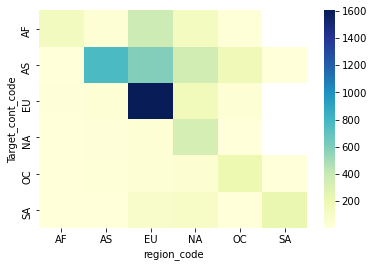

In [54]:
double_index_df = Target_country_info_df.groupby(['region_code','Target_cont_code']).count()
temp = double_index_df.reset_index().pivot(columns='region_code',index='Target_cont_code',values='Abs_country')

sns.color_palette()
sns.heatmap(temp, cmap="YlGnBu")
plt.show()

In [55]:
data = Target_country_info_df[Target_country_info_df.Journal == 'American Antiquity'].groupby(['region_code','Target_cont_code']).count()
data.reset_index().pivot(columns='region_code',index='Target_cont_code',values='Abs_country')

region_code,AF,EU,NA,OC,SA
Target_cont_code,,,,,
AF,NaN,NaN,7.0,NaN,NaN
AS,NaN,3.0,44.0,1.0,NaN
EU,NaN,3.0,7.0,2.0,NaN
NA,3.0,6.0,101.0,NaN,NaN
OC,NaN,1.0,7.0,5.0,NaN
SA,NaN,NaN,NaN,NaN,2.0


In [56]:
data = Target_country_info_df[Target_country_info_df.Journal == 'PLOS ONE'].groupby(['region_code','Target_cont_code']).count()
data.reset_index().pivot(columns='region_code',index='Target_cont_code',values='Abs_country')

region_code,AF,AS,EU,NA,OC,SA
Target_cont_code,,,,,,
AF,86.0,24.0,237.0,75.0,18.0,NaN
AS,7.0,423.0,291.0,165.0,62.0,NaN
EU,8.0,19.0,1032.0,81.0,21.0,NaN
NA,NaN,5.0,8.0,181.0,3.0,NaN
OC,4.0,9.0,16.0,23.0,110.0,1.0
SA,NaN,3.0,46.0,42.0,6.0,138.0


In [58]:
data = Target_country_info_df[Target_country_info_df.Journal == 'Antiquity'].groupby(['region_code','Target_cont_code']).count()
data.reset_index().pivot(columns='region_code',index='Target_cont_code',values='Abs_country')

region_code,AF,AS,EU,NA,OC,SA
Target_cont_code,,,,,,
AF,48.0,4.0,135.0,42.0,1.0,NaN
AS,NaN,342.0,297.0,139.0,113.0,2.0
EU,NaN,10.0,569.0,69.0,5.0,NaN
NA,NaN,3.0,17.0,53.0,NaN,NaN
OC,NaN,9.0,10.0,9.0,90.0,NaN
SA,1.0,1.0,34.0,49.0,NaN,75.0
